<a href="https://colab.research.google.com/github/abhinav-bhardwaj-mnit/Abhinav-1st/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving iris_petal_sepal.png to iris_petal_sepal (1).png


In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df['target']=iris.target


In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df[df.target==2].head() # a method to categorise


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [22]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [27]:
from matplotlib import pyplot as plt
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
df2.head()

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target flower_name
100                6.3               3.3                6.0               2.5       2   virginica
101                5.8               2.7                5.1               1.9       2   virginica
102                7.1               3.0                5.9               2.1       2   virginica
103                6.3               2.9                5.6               1.8       2   virginica
104                6.5               3.0                5.8               2.2       2   virginica
105                7.6               3.0                6.6               2.1       2   virginica
106                4.9               2.5                4.5               1.7       2   virginica
107                7.3               2.9                6.3               1.8       2   virginica
108                6.7               2.5                5.8               1.8       2   virginica
109                7.2               3.6                6.1               2.5       2   virginica
110                6.5               3.2                5.1               2.0       2   virginica
111                6.4               2.7                5.3               1.9       2   virginica
112                6.8               3.0                5.5               2.1       2   virginica
113                5.7               2.5                5.0               2.0       2   virginica
114                5.8               2.8                5.1               2.4       2   virginica
115                6.4               3.2                5.3               2.3       2   virginica
116                6.5               3.0                5.5               1.8       2   virginica
117                7.7               3.8                6.7               2.2       2   virginica
118                7.7               2.6                6.9               2.3       2   virginica
119                6.0               2.2                5.0               1.5       2   virginica
120                6.9               3.2                5.7               2.3       2   virginica
121                5.6               2.8                4.9               2.0       2   virginica
122                7.7               2.8                6.7               2.0       2   virginica
123                6.3               2.7                4.9               1.8       2   virginica
124                6.7               3.3                5.7               2.1       2   virginica
125                7.2               3.2                6.0               1.8       2   virginica
126                6.2               2.8                4.8               1.8       2   virginica
127                6.1               3.0                4.9               1.8       2   virginica
128                6.4               2.8                5.6               2.1       2   virginica
129                7.2               3.0                5.8               1.6       2   virginica
130                7.4               2.8                6.1               1.9       2   virginica
131                7.9               3.8                6.4               2.0       2   virginica
132                6.4               2.8                5.6               2.2       2   virginica
133                6.3               2.8                5.1               1.5       2   virginica
134                6.1               2.6                5.6               1.4       2   virginica
135                7.7               3.0                6.1               2.3       2   virginica
136                6.3               3.4                5.6               2.4       2   virginica
137                6.4               3.1                5.5               1.8       2   virginica
138                6.0               3.0                4.8               1.8       2   virginica
139                6.9               3.1          

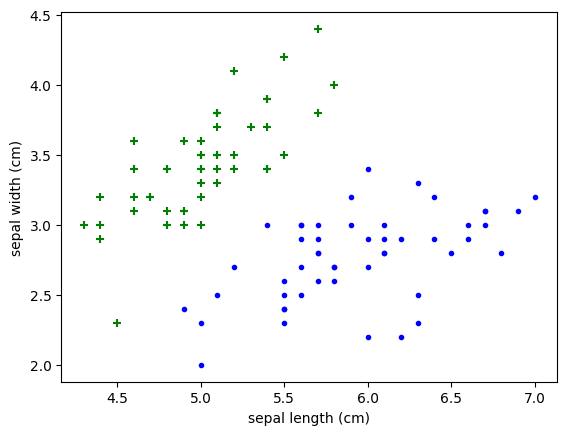

In [31]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')

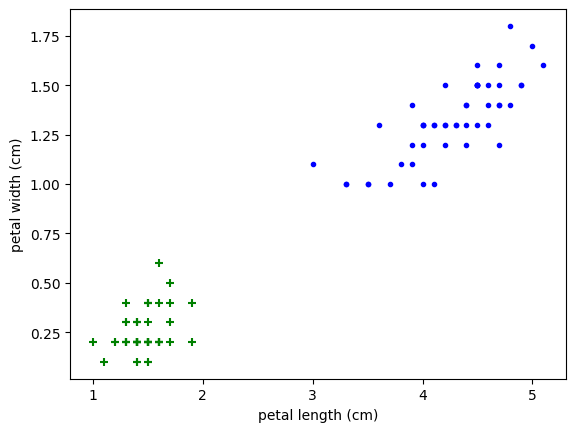

In [32]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'],axis ='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y = df.target
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [46]:
print(len(X_test))
len(X_train)


30


120

In [58]:
from sklearn.svm import SVC
model = SVC(C=.1)


In [59]:
model.fit(X_train,y_train)

SVC(C=0.1)

In [60]:
model.score(X_test,y_test)

0.6666666666666666

In [67]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0